### IDs:
Insert yours IDs to the cell below

ID #1: 302673355

ID #2: 207380528


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [70]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings
from sklearn.mixture import GaussianMixture
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(rc={'figure.figsize':(14, 7)})
sns.set(font_scale = 1.7)
plt.rcParams['figure.figsize'] = (15, 8)
sns.set(style="darkgrid")


### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### Answer
Since the Pearson coefficient is sensitive to extremes, we'll first generate data that answer the second requirement, and afterwards add extreme observations to it, to ensure the Pearson coefficient will be small


Pearson correlation coefficient for n-1 observations is 0.13 

Pearson correlation coefficient for n observations is -0.99

           x         y
0   1.673945 -1.619230
1   1.907142 -0.888920
2  -1.243481 -2.310190
3   0.897265 -1.871152
4   1.631711 -1.798503
5  -0.236381 -0.034519
6  -0.113265 -2.355645
7   1.741496 -0.410781
8   0.269943 -2.805265
9   2.279241 -2.175866
10  1.689813 -2.035409
11  1.601249  0.229229
12  0.207596 -0.668438
13  2.563642 -1.513217
14  0.700583 -0.626799
15 -0.492568  0.402685
16  1.131345 -1.077474
17  0.642363 -1.323583
18  1.241995 -1.599928
19  0.632037 -1.023673
20 -0.967088 -1.915415
21  1.713629 -1.329100
22  0.476434 -0.344246
23  2.391756 -2.297071
24 -0.267287 -0.478551
25  0.600307 -0.349145
26  1.427277 -2.787637
27  1.296718 -0.350403
28 -0.185207 -0.828986
29  0.720150 -0.935654
30  1.425341 -0.368755
31  2.489617 -2.038021
32  1.247154 -0.640461
33  2.446745 -0.574346
34 -0.034740 -1.115497
35  0.554858 -2.523777
36 -0.013040 -3.326687
37

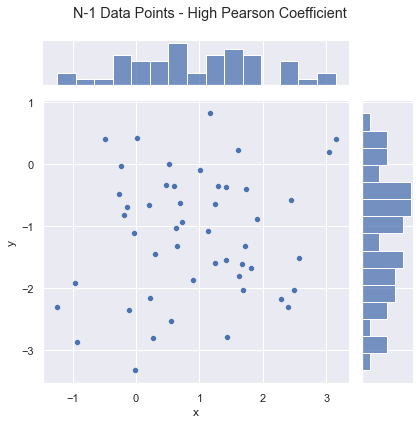

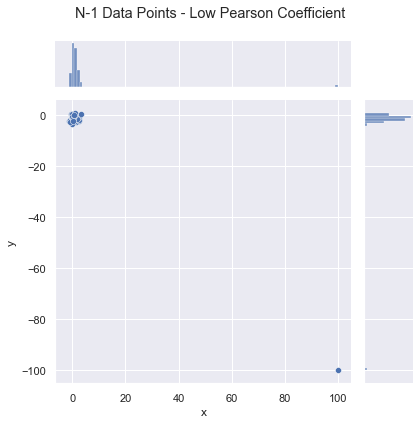

In [54]:
sig = np.array([[1,0.2],[0.2,1]])
X = stats.multivariate_normal([1,-1],sig)
df_high = pd.DataFrame(X.rvs(49), columns=['x', 'y'])
pearson_high = stats.pearsonr(df_high['x'], df_high['y'])[0]
print(f"Pearson correlation coefficient for n-1 observations is {pearson_high:.2f} \n")

df_low = pd.concat([df_high, pd.DataFrame([[100, -100]], columns=['x','y'])], axis=0)
pearson_low = stats.pearsonr(df_low['x'], df_low['y'])[0]
print(f"Pearson correlation coefficient for n observations is {pearson_low:.2f}\n")

print(df_high)
print(df_low)

high = sns.jointplot(x=df_high['x'],y=df_high['y'], marginal_kws=dict(bins=15))
high.fig.suptitle("N-1 Data Points - High Pearson Coefficient")
high.fig.tight_layout()
high.fig.subplots_adjust(top=0.9)
low = sns.jointplot(x=df_low['x'],y=df_low['y'], marginal_kws=dict(bins=100))
low.fig.suptitle("N-1 Data Points - Low Pearson Coefficient")
low.fig.tight_layout()
low.fig.subplots_adjust(top=0.9)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

Kendall Tau is -0.020 and Spearman is -0.501. 
Kendall is greater than Spearman by 0.480
     x   y  x_rank  y_rank  rank_diff
0    0  50     1.0    26.0       25.0
1    1  51     2.0    27.0       25.0
2    2  52     3.0    28.0       25.0
3    3  53     4.0    29.0       25.0
4    4  54     5.0    30.0       25.0
5    5  55     6.0    31.0       25.0
6    6  56     7.0    32.0       25.0
7    7  57     8.0    33.0       25.0
8    8  58     9.0    34.0       25.0
9    9  59    10.0    35.0       25.0
10  10  60    11.0    36.0       25.0
11  11  61    12.0    37.0       25.0
12  12  62    13.0    38.0       25.0
13  13  63    14.0    39.0       25.0
14  14  64    15.0    40.0       25.0
15  15  65    16.0    41.0       25.0
16  16  66    17.0    42.0       25.0
17  17  67    18.0    43.0       25.0
18  18  68    19.0    44.0       25.0
19  19  69    20.0    45.0       25.0
20  20  70    21.0    46.0       25.0
21  21  71    22.0    47.0       25.0
22  22  72    23.0    48.0       25.0

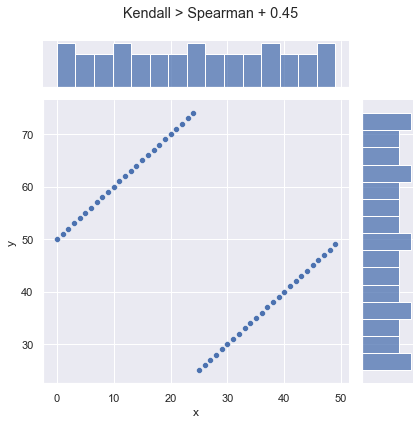

In [55]:
x = np.arange(0,50)
y = x*1
y[:25] = x[:25] + 50
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()
df['rank_diff'] = abs(df['x_rank'] - df['y_rank'])
kendall = df.corr(method='kendall').loc['x'].iloc[1]
spearman = df.corr(method='spearman').loc['x'].iloc[1]
k_s = sns.jointplot(x=df['x'], y=df['y'], marginal_kws=dict(bins=15))
k_s.fig.suptitle("Kendall > Spearman + 0.45")
k_s.fig.tight_layout()
k_s.fig.subplots_adjust(top=0.9)
print(f'Kendall Tau is {kendall:.3f} and Spearman is {spearman:.3f}. \nKendall is greater than Spearman by {(kendall - spearman):.3f}')
print(df)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

Kendall Tau is 0.020 and Spearman is 0.501. 
Spearman is greater than Kendall by 0.480
     x   y  x_rank  y_rank  rank_diff
0   50   0    26.0    50.0       24.0
1   51  -1    27.0    49.0       22.0
2   52  -2    28.0    48.0       20.0
3   53  -3    29.0    47.0       18.0
4   54  -4    30.0    46.0       16.0
5   55  -5    31.0    45.0       14.0
6   56  -6    32.0    44.0       12.0
7   57  -7    33.0    43.0       10.0
8   58  -8    34.0    42.0        8.0
9   59  -9    35.0    41.0        6.0
10  60 -10    36.0    40.0        4.0
11  61 -11    37.0    39.0        2.0
12  62 -12    38.0    38.0        0.0
13  63 -13    39.0    37.0        2.0
14  64 -14    40.0    36.0        4.0
15  65 -15    41.0    35.0        6.0
16  66 -16    42.0    34.0        8.0
17  67 -17    43.0    33.0       10.0
18  68 -18    44.0    32.0       12.0
19  69 -19    45.0    31.0       14.0
20  70 -20    46.0    30.0       16.0
21  71 -21    47.0    29.0       18.0
22  72 -22    48.0    28.0       20.0
2

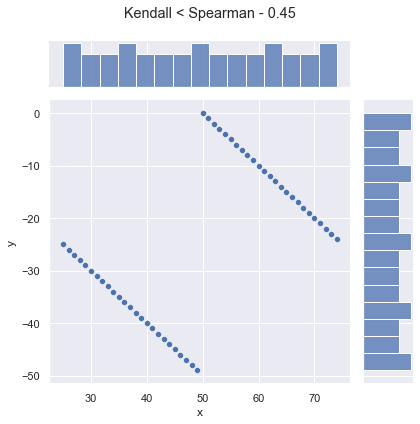

In [56]:
x = np.arange(0,50)
y = x*-1
x[:25] = x[:25] + 50
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()
df['rank_diff'] = abs(df['x_rank'] - df['y_rank'])
kendall = df.corr(method='kendall').loc['x'].iloc[1]
spearman = df.corr(method='spearman').loc['x'].iloc[1]
s_k = sns.jointplot(x=df['x'], y=df['y'], marginal_kws=dict(bins=15))
s_k.fig.suptitle("Kendall < Spearman - 0.45")
s_k.fig.tight_layout()
s_k.fig.subplots_adjust(top=0.9)
print(f'Kendall Tau is {kendall:.3f} and Spearman is {spearman:.3f}. \nSpearman is greater than Kendall by {(spearman - kendall):.3f}')
print(df)


#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

Pearson is -0.994 and Spearman is -0.000. 
Pearson is lower than Spearman by 0.994
             x           y
0     1.673945   -1.619230
1     1.907142   -0.888920
2    -1.243481   -2.310190
3     0.897265   -1.871152
4     1.631711   -1.798503
5    -0.236381   -0.034519
6    -0.113265   -2.355645
7     1.741496   -0.410781
8     0.269943   -2.805265
9     2.279241   -2.175866
10    1.689813   -2.035409
11    1.601249    0.229229
12    0.207596   -0.668438
13    2.563642   -1.513217
14    0.700583   -0.626799
15   -0.492568    0.402685
16    1.131345   -1.077474
17    0.642363   -1.323583
18    1.241995   -1.599928
19    0.632037   -1.023673
20   -0.967088   -1.915415
21    1.713629   -1.329100
22    0.476434   -0.344246
23    2.391756   -2.297071
24   -0.267287   -0.478551
25    0.600307   -0.349145
26    1.427277   -2.787637
27    1.296718   -0.350403
28   -0.185207   -0.828986
29    0.720150   -0.935654
30    1.425341   -0.368755
31    2.489617   -2.038021
32    1.247154   -0.640461

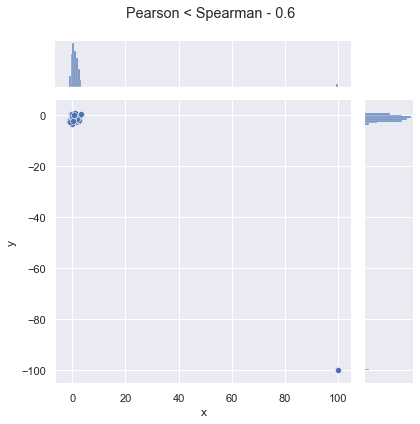

In [57]:
spearman_low = df_low.corr(method='spearman').loc['x'].iloc[1]
p_s = sns.jointplot(x=df_low['x'], y=df_low['y'], marginal_kws=dict(bins=150))
p_s.fig.suptitle("Pearson < Spearman - 0.6")
p_s.fig.tight_layout()
p_s.fig.subplots_adjust(top=0.9)
print(f'Pearson is {pearson_low:.3f} and Spearman is {spearman_low:.3f}. \nPearson is lower than Spearman by {(spearman_low - pearson_low):.3f}')
print(df_low)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

Pearson is 1.000 and Spearman is -0.769. 
Pearson is higher than Spearman by 1.769
               x             y  rank_diff
0   10000.000000  10000.000000        0.0
1       0.020408      0.979592       47.0
2       0.040816      0.959184       45.0
3       0.061224      0.938776       43.0
4       0.081633      0.918367       41.0
5       0.102041      0.897959       39.0
6       0.122449      0.877551       37.0
7       0.142857      0.857143       35.0
8       0.163265      0.836735       33.0
9       0.183673      0.816327       31.0
10      0.204082      0.795918       29.0
11      0.224490      0.775510       27.0
12      0.244898      0.755102       25.0
13      0.265306      0.734694       23.0
14      0.285714      0.714286       21.0
15      0.306122      0.693878       19.0
16      0.326531      0.673469       17.0
17      0.346939      0.653061       15.0
18      0.367347      0.632653       13.0
19      0.387755      0.612245       11.0
20      0.408163      0.591837     

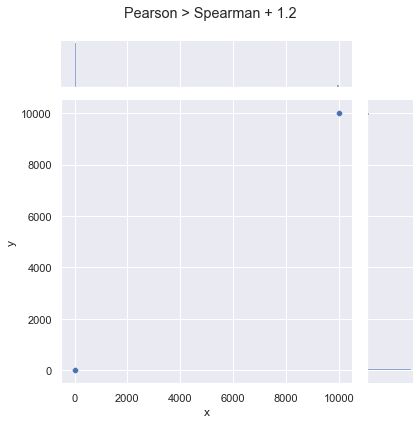

In [58]:
x = np.linspace(0, 1, 50)
y = x[::-1]
x[0] = y[0] = 10000
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['rank_diff'] = abs(df['x'].rank() - df['y'].rank())
spearman_e = df.corr(method='spearman').loc['x'].iloc[1]
pearson_e = df.corr().loc['x'].iloc[1]
p_s = sns.jointplot(x=df['x'], y=df['y'], marginal_kws=dict(bins=150))
p_s.fig.suptitle("Pearson > Spearman + 1.2")
p_s.fig.tight_layout()
p_s.fig.subplots_adjust(top=0.9)

print(f'Pearson is {pearson_e:.3f} and Spearman is {spearman_e:.3f}. \nPearson is higher than Spearman by {(pearson_e - spearman_e):.3f}')
print(df)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

#### Answer

Since both Spearman and Kendall are rank-based correlation coefficient, they cannot have opposite directions. As shown above, they are both sensitive to different issues, but both have to go in the same direction. Since both of them range between -1 and 1, it's impossible fore one to be greater than the other by more than 1.

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


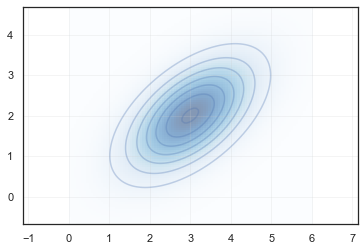

In [145]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [104]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [106]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


### ANSWER
###### Handle missing values
First, we'll find the columns with missing values. Then, we'll map them by their type. Lastly, we'll fill the missing values according to their type:

In [108]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na > 0]
na

age         8
trestbps    6
chol        6
cp          5
oldpeak     5
sex         4
thalach     4
fbs         3
restecg     2
dtype: int64

In [109]:
CATEGORICAL_COLUMNS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
NUMERICAL_COLUMNS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i in na.index:
    if i in CATEGORICAL_COLUMNS:
        df[i].fillna(df[i].mode(), inplace=True)
    df[i].fillna(df[i].median(), inplace=True)

df.isna().sum().sort_values(ascending=False)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

To check whether the healthy population's mean is larger/smaller than the disease population's mean, we'll compute the confidence interval of the difference between the two populations and see if 0 (null hypothesis) is in that range.

In [215]:
def compare_means(df, col):
    diff_means = df[df.target == 0][col].mean() - df[df.target == 1][col].mean()
    se_0, se_1 = df[df.target == 0][col].sem(), df[df.target == 1][col].sem()
    total_se = np.sqrt(se_0**2 + se_1**2)
    t = (diff_means - 0)/(total_se)
    ci = (diff_means - 1.96 * total_se, diff_means + 1.96 * total_se)
    if 0 < ci[0] or 0 > ci[1]:  # significant more than 0.05
        if t > 0:
            return f"Healthy population's mean for {col} is higher than the diseased population's mean"
        return f"Healthy population's mean for {col} is lower than the diseased population's mean"
    return f"The difference in means for {col} is not significant"


In [216]:
for col in NUMERICAL_COLUMNS:
    print(compare_means(df, col), "\n")

Healthy population's mean for age is higher than the diseased population's mean 

Healthy population's mean for trestbps is higher than the diseased population's mean 

The difference in means for chol is not significant 

Healthy population's mean for thalach is lower than the diseased population's mean 

Healthy population's mean for oldpeak is higher than the diseased population's mean 



#### Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.


Text(0.5, 1.0, 'Age Histogram')

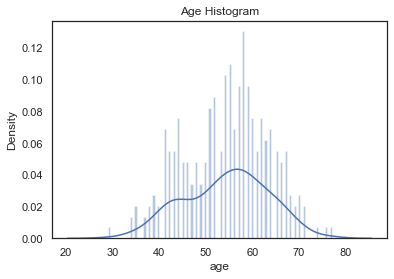

In [118]:
sns.distplot(df['age'], bins=100, kde=True).set_title('Age Histogram')

`age` seems like a Gaussian mixture. It seems like a mixture of two Gaussians, so we'll fit accordingly:

In [121]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(df.age.to_numpy().reshape(-1, 1))

print(f"Converged: {gmm.converged_}")
for i, mean, cov, weight in zip(range(1, 3), gmm.means_, gmm.covariances_, gmm.weights_):
    print(f"For Gauusian # {i}: mean={mean[0]:.3f}, std={cov[0][0]:.3f}, weight={weight:.3f}")


Converged: True
For Gauusian # 1: mean=45.407, std=34.378, weight=0.358
For Gauusian # 2: mean=59.424, std=35.238, weight=0.642


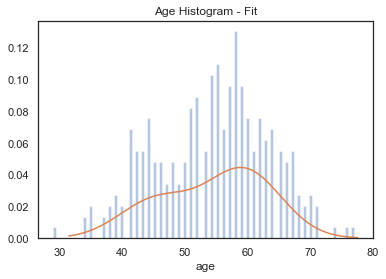

In [124]:
sns.distplot(df['age'], bins=100, kde=False, norm_hist=True).set_title('Age Histogram - Fit')

norm_params = np.array([[gmm.means_.reshape(1, -1)[0][0], np.sqrt(gmm.covariances_.reshape(1, -1)[0][0])],
                        [gmm.means_.reshape(1, -1)[0][1], np.sqrt(gmm.covariances_.reshape(1, -1)[0][1])]
                        ])
weights = gmm.weights_
mixture_idx = np.random.choice(len(weights), size=len(df.age), replace=True, p=weights)
y = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += stats.norm.pdf(xs, loc=l, scale=s) * w

plt.plot(xs, ys)
plt.show()

Text(0.5, 1.0, 'Trestbps Histogram')

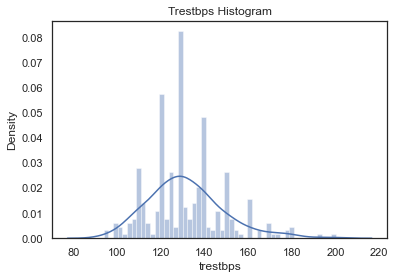

In [125]:
sns.distplot(df['trestbps'], bins=50, kde=True).set_title('Trestbps Histogram')

`trstbps` looks like a Normal distribution

Text(0.5, 1.0, 'Trestbps Histogram - Fit')

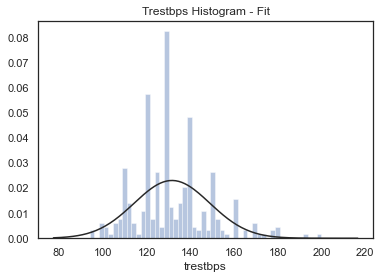

In [126]:
sns.distplot(df['trestbps'], bins=50, kde=False, fit=stats.norm).set_title('Trestbps Histogram - Fit')

Text(0.5, 1.0, 'Chol Histogram')

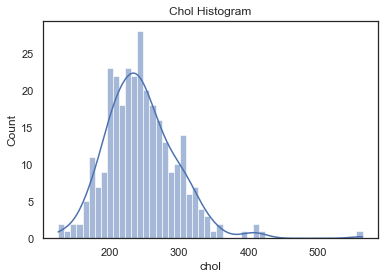

In [127]:
sns.histplot(df['chol'], bins=50, kde=True).set_title('Chol Histogram')

`chol` looks like a right-skewed Normal distribution as well:

Text(0.5, 1.0, 'Chol Histogram - Fit')

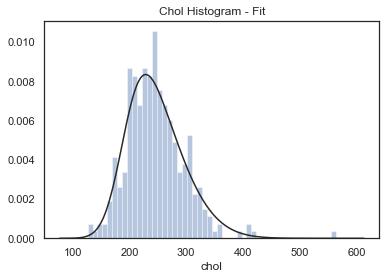

In [129]:
sns.distplot(df['chol'], bins=50, kde=False, fit=stats.skewnorm).set_title('Chol Histogram - Fit')

Text(0.5, 1.0, 'Thalach Histogram')

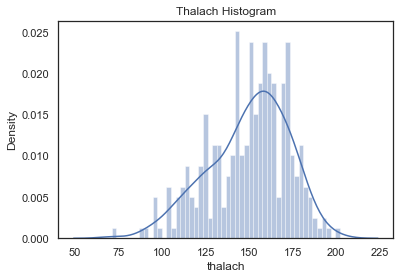

In [130]:
sns.distplot(df['thalach'], bins=50, kde=True).set_title('Thalach Histogram')

`thalach` looks like a left-skewed Normal distribution:

Text(0.5, 1.0, 'Thalach Histogram - Fit')

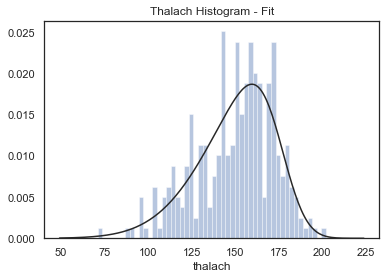

In [131]:
sns.distplot(df['thalach'], bins=50, kde=False, fit=stats.skewnorm).set_title('Thalach Histogram - Fit')

Text(0.5, 1.0, 'Oldpeak Histogram')

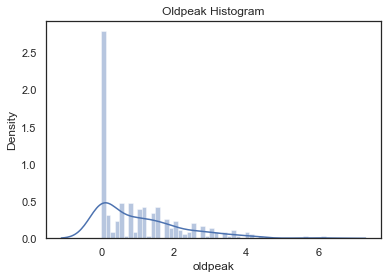

In [132]:
sns.distplot(df['oldpeak'], bins=50, kde=True).set_title('Oldpeak Histogram')

`oldpeak` looks like an Exponential distribution. It makes sense, as ST segments measure time between events.

Text(0.5, 1.0, 'Oldpeak Histogram - Fit')

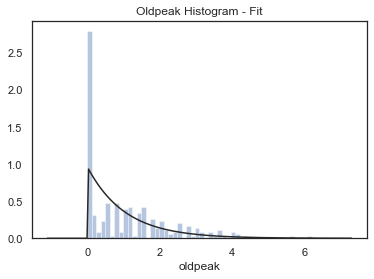

In [133]:
sns.distplot(df['oldpeak'], bins=50, kde=False, fit=stats.expon).set_title('Oldpeak Histogram - Fit')

#### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).


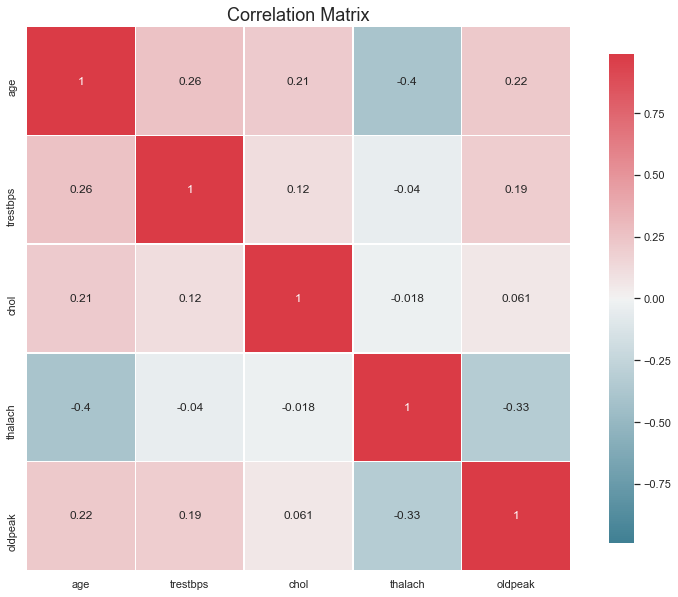

In [134]:
sns.set(style="white")

plt.figure(figsize=(14, 10))
corr = df[NUMERICAL_COLUMNS].corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True)

plt.title("Correlation Matrix", fontsize=18)
plt.show()

We'll draw jointplots of feature pairs only if the Pearson coefficient is larger than 0.2, as it seems redundant to do that for weakly correlated sets of features.

In [157]:
COMBS = list(itertools.combinations(NUMERICAL_COLUMNS, 2))
PEARSON_COEF_THRESHOLD = 0.2

The Pearson coefficient between age and trestbps is significant with p value: 0.000 and corr: 0.257


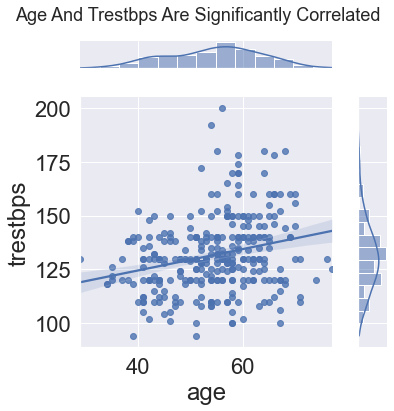

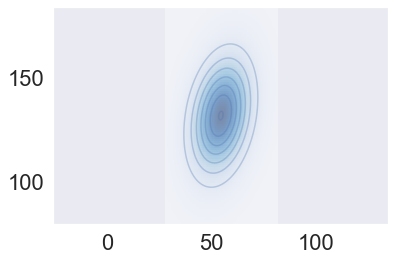

The Pearson coefficient between age and chol is significant with p value: 0.000 and corr: 0.209


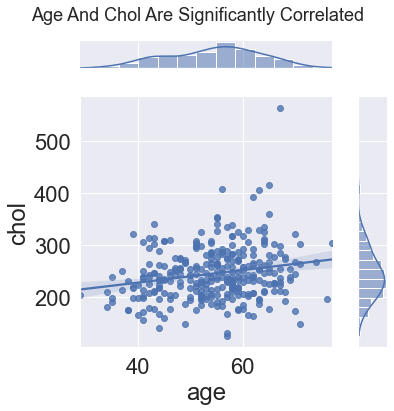

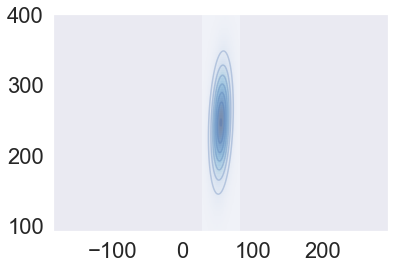

The Pearson coefficient between age and thalach is significant with p value: 0.000 and corr: -0.402


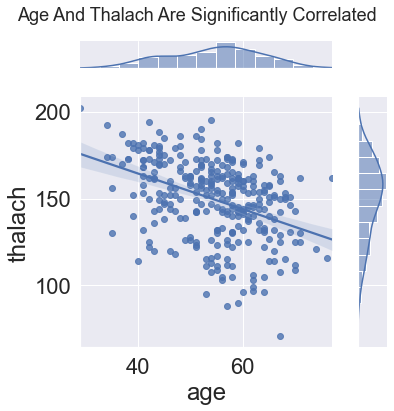

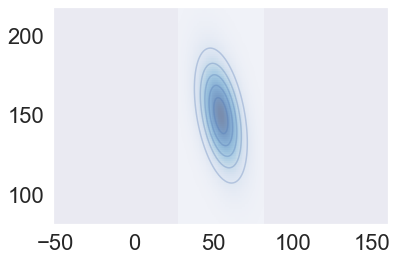

The Pearson coefficient between age and oldpeak is significant with p value: 0.000 and corr: 0.218


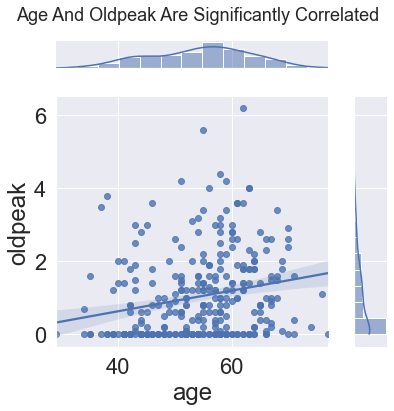

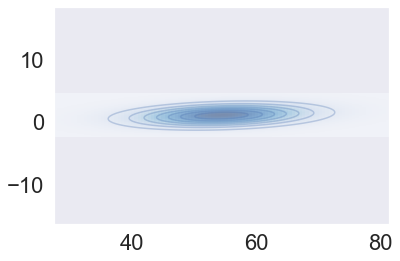

The Pearson coefficient between thalach and oldpeak is significant with p value: 0.000 and corr: -0.330


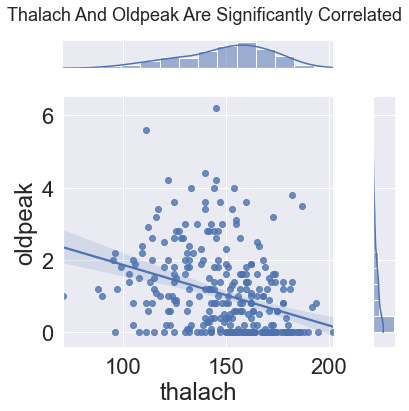

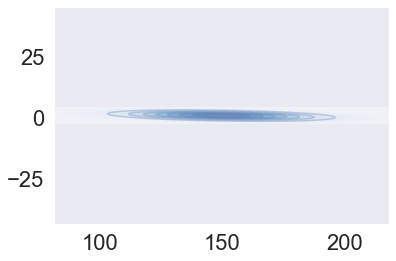

In [212]:
for comb in COMBS:
    pearson_val, pearson_pval = stats.pearsonr(df[comb[0]], df[comb[1]])
    comb_0, comb_1 = comb[0], comb[1]
    if pearson_pval <= 0.05 and abs(pearson_val) > PEARSON_COEF_THRESHOLD:
        print(f'The Pearson coefficient between {comb_0} and {comb_1} is significant with p value: {pearson_pval:.3f} and corr: {pearson_val:.3f}')
        jointplot = sns.jointplot(df[comb_0], df[comb_1], kind="reg")
        jointplot.fig.suptitle(f'{comb_0} And {comb_1} Are Significantly Correlated'.title(), fontsize=18)
        jointplot.fig.tight_layout()
        jointplot.fig.subplots_adjust(top=0.9)
        plt.show()
        cov = np.cov(df[comb_0], df[comb_1])

        means = [np.mean(df[comb_0]), np.mean(df[comb_1])]
        plot_2d_Gaussian_pdf(means, cov)


### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?


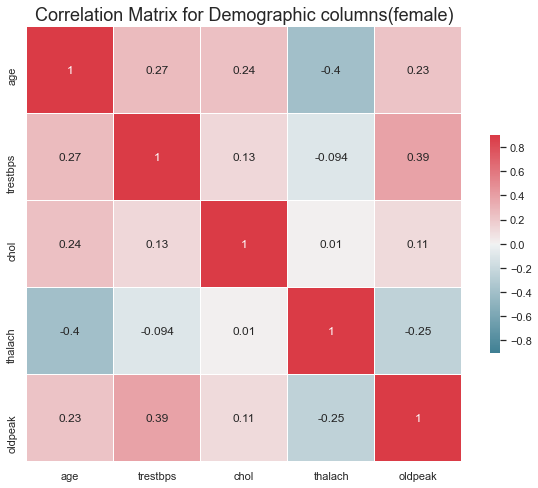

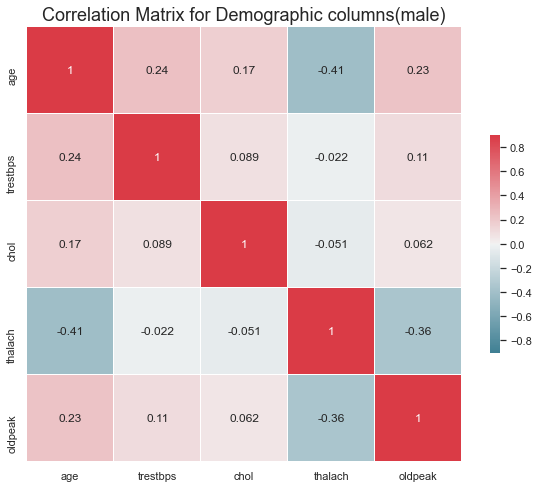

In [159]:
numeric_df_w_sex = df[NUMERICAL_COLUMNS + ['sex']]
for i, gender in enumerate(['female', 'male']):
    sns.set(style="white")
    corr = numeric_df_w_sex.drop(columns=['sex'])[numeric_df_w_sex.sex == i].corr()

    f, ax = plt.subplots(figsize=(10, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, vmax=.9, vmin=-0.9, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.title("Correlation Matrix for Demographic columns({})".format(gender), fontsize=18)
    plt.show()

The Pearson coefficient between trestbps and oldpeak is significant for the female population and not for the male population.
 The Perason coef is 0.389 for the female population.


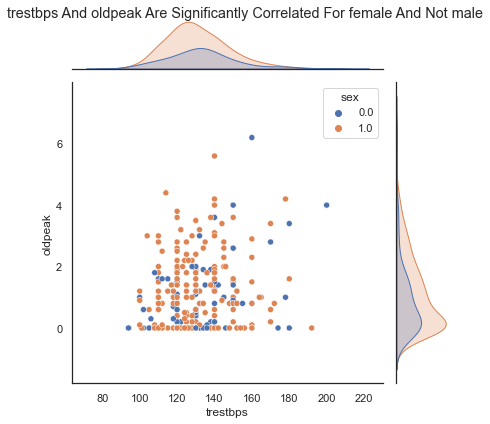

In [167]:
def compare_num_features(hue_col):
    pop_0, pop_1 = 'female', 'male'
    if hue_col == 'target':
        pop_0, pop_1 = 'healthy', 'disease'
    for comb in COMBS:
        pearson_coef_pop_0, pearson_pval_pop_0 = stats.pearsonr(df[comb[0]][df[hue_col] == 0], df[comb[1]][df[hue_col] == 0])
        pearson_coef_pop_1, pearson_pval_pop_1 = stats.pearsonr(df[comb[0]][df[hue_col] == 1], df[comb[1]][df[hue_col] == 1])
        pop_1_and_not_pop_0 = pearson_pval_pop_1 < 0.05 and pearson_coef_pop_1 > PEARSON_COEF_THRESHOLD and pearson_pval_pop_0 > 0.05
        not_pop_1_and_pop_0 = pearson_pval_pop_1 > 0.05 and pearson_pval_pop_0 < 0.05 and pearson_coef_pop_0 > PEARSON_COEF_THRESHOLD
        if pop_1_and_not_pop_0:
            print(f'The Pearson coefficient between {comb[0]} and {comb[1]} is significant for the {pop_1} population and not for the {pop_0} population.\n The Perason coef is {pearson_coef_pop_1:.3f} for the {pop_1} population.')
            p1_not_p0 = sns.jointplot(df[comb[0]], df[comb[1]], hue=df[hue_col])
            p1_not_p0.fig.suptitle(f'{comb[0]} And {comb[1]} Are Significantly Correlated For {pop_1} And Not {pop_0}')
            p1_not_p0.fig.tight_layout()
            p1_not_p0.fig.subplots_adjust(top=0.95)

        if not_pop_1_and_pop_0:
            print(f'The Pearson coefficient between {comb[0]} and {comb[1]} is significant for the {pop_0} population and not for the {pop_1} population.\n The Perason coef is {pearson_coef_pop_0:.3f} for the {pop_0} population.')
            p0_not_p1 = sns.jointplot(df[comb[0]], df[comb[1]], hue=df[hue_col])
            p0_not_p1.fig.suptitle(f'{comb[0]} And {comb[1]} Are Significantly Correlated For {pop_0} And Not {pop_1}')
            p0_not_p1.fig.tight_layout()
            p0_not_p1.fig.subplots_adjust(top=0.95)


compare_num_features('sex')

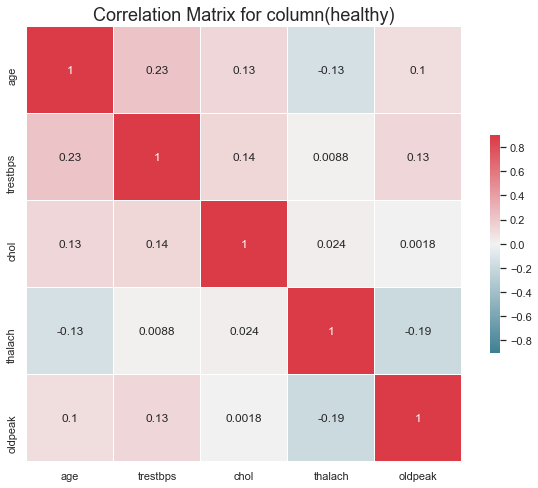

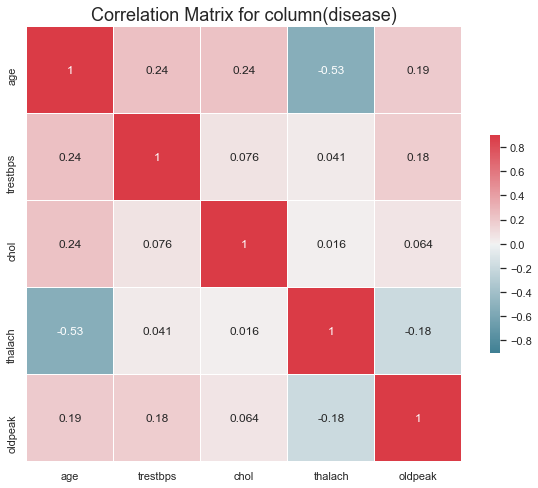

In [168]:
numeric_df_w_target = df[NUMERICAL_COLUMNS + ['target']]
for i, health in enumerate(['healthy', 'disease']):
    sns.set(style="white")
    corr = numeric_df_w_target.drop(columns=['target'])[numeric_df_w_target.target == i].corr()

    f, ax = plt.subplots(figsize=(10, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, vmax=.9, vmin=-0.9, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.title(f"Correlation Matrix for column({health})", fontsize=18)
    plt.show()

The Pearson coefficient between age and chol is significant for the disease population and not for the healthy population


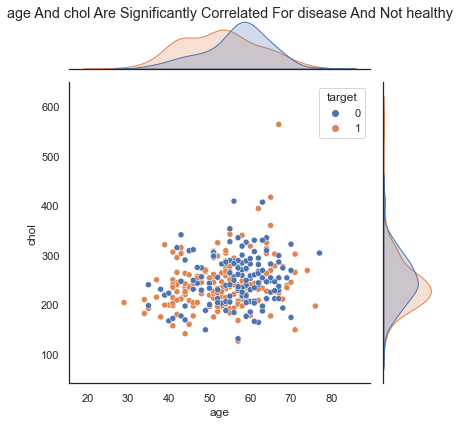

In [162]:
compare_num_features('target')

### For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


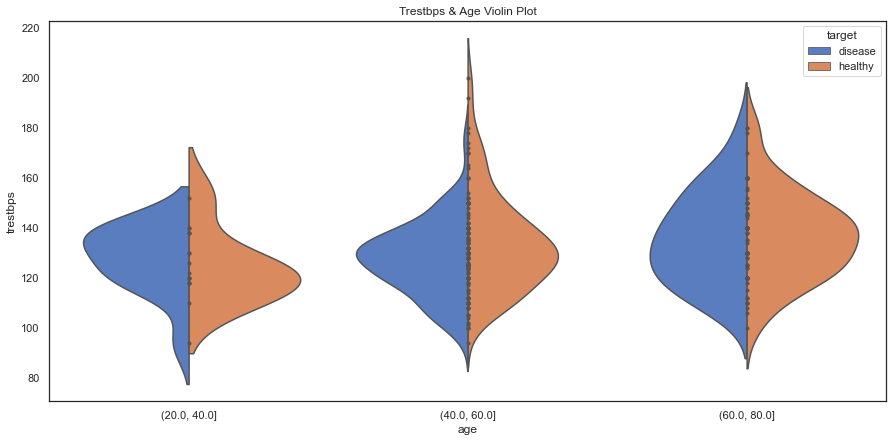

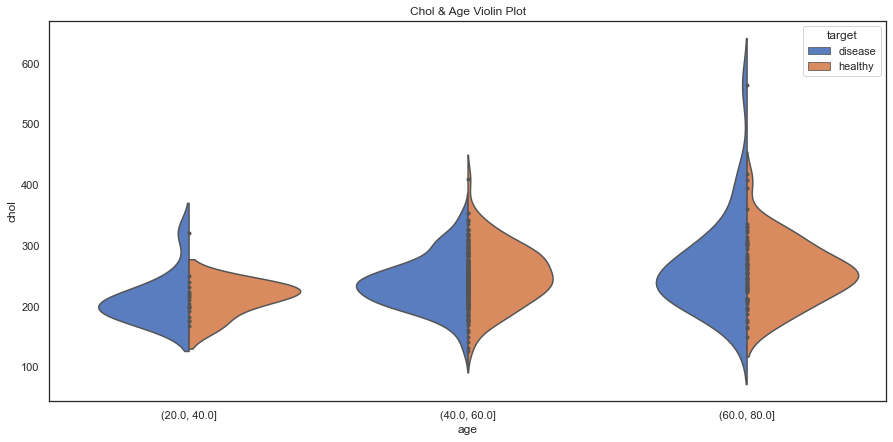

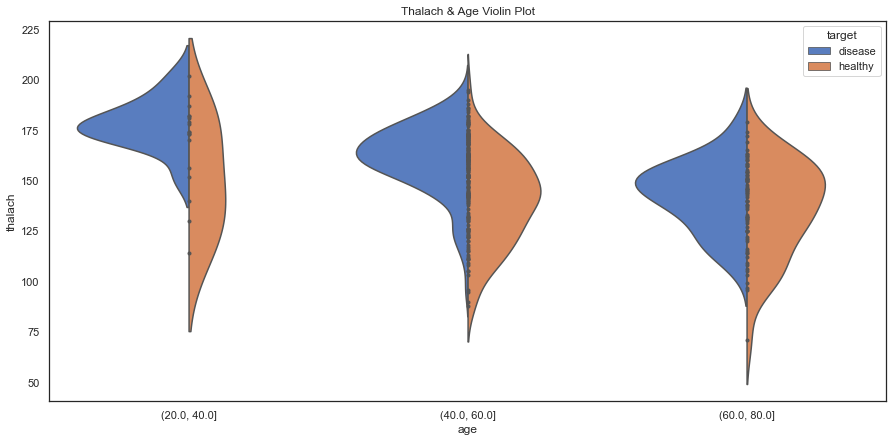

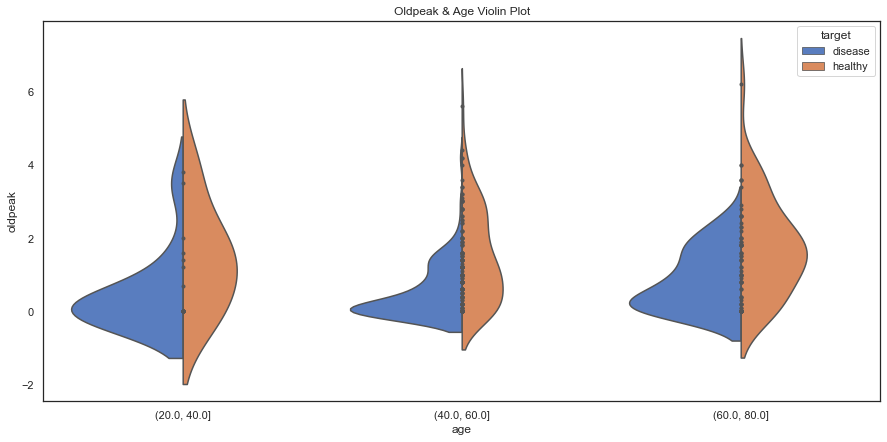

In [180]:
features = [col for col in NUMERICAL_COLUMNS if col != 'age'] + ['target']

df_temp = df[features]
df_temp.loc[: , ['target']] = df_temp['target'].apply(lambda x: 'healthy' if x == 0 else 'disease')

bins = np.linspace(20,80,4)
df_temp.loc[: , ['age']] = pd.cut(x=df.age, bins=bins)

for f in features:
    if f == 'target':
        continue
    plt.figure(figsize=(15, 7))
    g = sns.violinplot(x='age', y=f, data=df_temp, hue='target',split=True, palette="muted", inner='point')
    g.set_title(f'{f} & Age Violin plot'.title())
    plt.show()

#### Suggest, state and address at least one original question.
We've decicded to check how does sex and CA (number of major vessels (0-3) colored by flourosopy) interact with regards to the target. Both sex and CA are categorical features, and we thought they might interact in an interesting manner.

Text(0.5, 1.0, 'Target Average & Confidence Intervals By Ca & Sex')

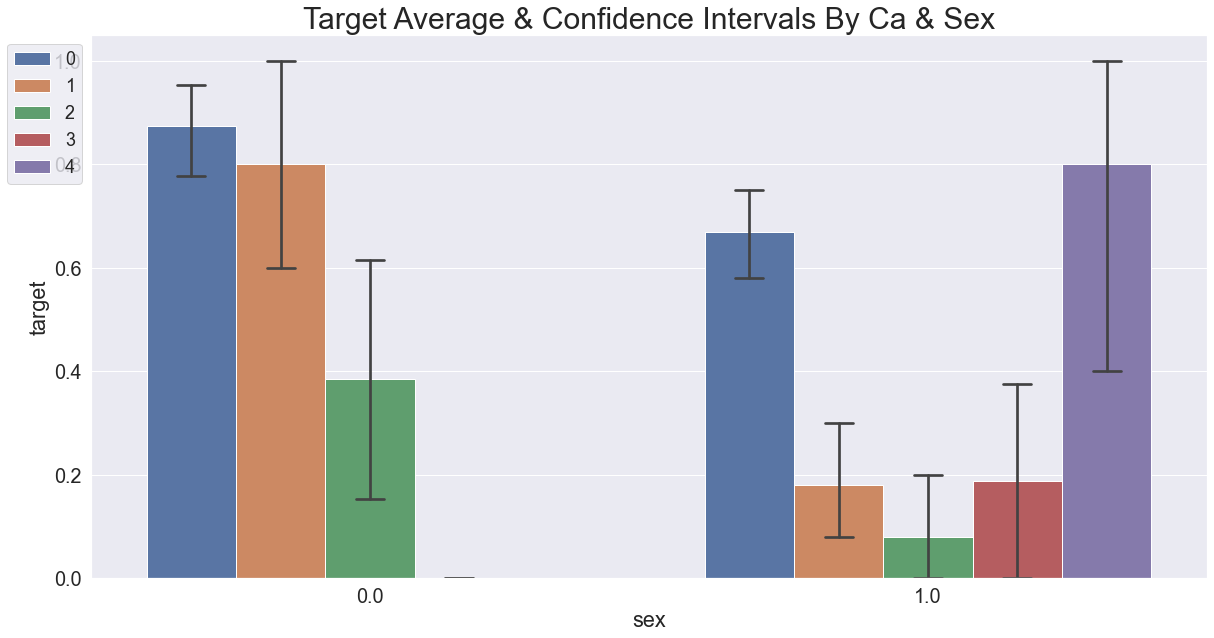

In [206]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x="sex", y="target", data=df, hue="ca", capsize=.05, )
plt.legend(loc = 'best', bbox_to_anchor=(0, 1), fontsize=18)
plt.title("Target average & confidence intervals by CA & Sex".title(), fontsize=30)

In the above bar plot we can see the effects of the different values of CA on different sexes. For example, we can see that values 3 and 4 are only relevant for males. Especially, CA=4 has an extremely high target value on average. However, judging from the range of the confidence interval, it isn't very widespread.
Furthermore, we can see that for CA values within 0 and 1, females have a higher target mean. We can use an iteration of our code from previous questions to see if the difference is significant:

In [225]:
df_filtered_0 = df[df.ca == 0]
df_filtered_1 = df[df.ca == 1]

def compare_filtered_mean(df_filtered):
    diff_means = df_filtered[df_filtered.sex == 0]['target'].mean() - df_filtered[df_filtered.sex == 1]['target'].mean()
    se_0, se_1 = df_filtered[df_filtered.sex == 0]['target'].sem(), df_filtered[df_filtered.sex == 1]['target'].sem()
    total_se = np.sqrt(se_0**2 + se_1**2)
    t = (diff_means - 0)/(total_se)
    ci = (diff_means - 1.96 * total_se, diff_means + 1.96 * total_se)
    if 0 < ci[0] or 0 > ci[1]:  # significant more than 0.05
        print(f"The difference between the means is significant. The CI are [{ci[0]:.3f}, {ci[1]:.3f}]")
    else:
        print("The difference in means is not significant")

compare_filtered_mean(df_filtered_0)
compare_filtered_mean(df_filtered_1)

The difference between the means is significant. The CI are [0.083, 0.324]
The difference between the means is significant. The CI are [0.384, 0.856]


### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

##### Answer:
<b>Yes, it does<b>.

</br>
</br>

Let $Y = e^{X}$ be a random variable which is log-normal distributed, and X is standard normal distributed.

$$\lim_{x\to\infty} e^{tx}P(Y > x) = \lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big) = \lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}}$$

lopital rule --->
$$\lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(ln x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{t \cdot x \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{\frac {(ln x)^2}{2}} \cdot t \cdot x} = \lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{0.5} \cdot t \cdot x^3}$$

more lopitals --->

$$\lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{0.5} \cdot t \cdot x^3} = .. = .. = \infty$$


To conclude,


$$\forall t > 0, \lim_{x\to\infty} e^{tx}P(Y > x) = \infty$$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$P(X_1 < X_2) = 
\int_0^\infty PDF_2(y) * CDF_1(X_1 < y) \;dy = \int_0^\infty \lambda_2 \cdot e^{-\lambda_2 y } (1 - e^{-\lambda_1 y }) \;dy = \frac{\lambda_1} {\lambda_1 + \lambda_2}
$

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

#### #1

We can look at: $R(\vec{x}(n))$ from another perspective: the number of samples that are lower than or equal to M.
</br>
What is the range R can take?
</br>
We "know" the median value of X. But that doesn't gurentee entything regarding samples.
</br>
So, R is in [0, n]. That is, all the samples could be bigger than M (R = 0) or all the samples could be lower than or equal to M (R = n, # of samples).
</br>
#### The Distribution of R ~ Binomial(p = $P(X\le m) = 0.5$, n = n = # of samples))
</br>

#### #2

Again, we can ask this question as follows: 
</br>
what is the <number_of_samples_given_n>(=$\lambda(n)$), that the probabilty to get at least <number_of_samples> lower than or equal to M is greater than or equal to 95% 
</br>
AND
</br>
the probabilty to get at least (<number_of_samples_given_n> + 1)(=$\lambda(n)$ + 1) lower than or equal to M is lower than 95% 

In [ ]:
from scipy.stats import binom


def return_lambda(n: int):
    
    binom_var = binom(p=0.5, n=n)
    # binom_var is the number of "successes", in this case: the number of samples lower than M
    
    for k in range(1, n):
        #print(1-binom_var.cdf(k))  # the probabilty for at least k samples to be <= M
        
        if (1-binom_var.cdf(k)) >= 0.95 and (1-binom_var.cdf(k+1)) < 0.95:
            result_lambda = k
            print(f"Lambda: {result_lambda}\n"
            f"1-binom_var.cdf({k}) = {1-binom_var.cdf(k):.3f}\n"
            f"1-binom_var.cdf({k+1}) = {1-binom_var.cdf(k+1):.3f}\n")
                  
            return result_lambda
        
    print("No such lambda found!")


In [ ]:
return_lambda(10001)